In [1]:
from influxdb import DataFrameClient
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import datetime

client = DataFrameClient('localhost', 8086, 'admin', 'admin', 'k6')


In [2]:
default_test_endpoint='http://node.default.127.0.0.1.nip.io'
target='local'
simulation_identifier='local02'

In [171]:
# TESTE T1

! ../k6_scripts/run_load.sh t1 $default_test_endpoint $target $simulation_identifier

Running test (t1) - http://node.default.127.0.0.1.nip.io/ - local - identifier=local01

          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: /home/jovyan/k6_scripts/t1.js
     output: InfluxDBv1 (http://localhost:8086)

  scenarios: (100.00%) 1 scenario, 1 max VUs, 1m0s max duration (incl. graceful stop):
           * t1: 1 looping VUs for 1m0s


     ✓ success

     checks.........................: 100.00% ✓ 24735      ✗ 0    
     data_received..................: 6.3 MB  104 kB/s
     data_sent......................: 2.3 MB  39 kB/s
     http_req_blocked...............: avg=6.26µs  min=942ns   med=3.43µs  max=63.9ms   p(90)=4.79µs  p(95)=5.43µs 
     http_req_connecting............: avg=5ns     min=0s      med=0s      max=147.21µs p(90)=0s      p(95)=0s     
     http_req_duration..............: avg=2.26ms  min=1.1

In [172]:
# RESULTS T1

bind_params={'s': simulation_identifier, 't':'t1' }
df = client.query('SELECT * FROM "http_req_duration" WHERE simulation=$s and type=$t',bind_params=bind_params)['http_req_duration']
df['time'] = (df.index - df.index.min()).total_seconds()
df

,expected_response,method,name,proto,scenario,simulation,status,target,type,url,value,time
2021-08-26 18:34:03.141704+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,4.832046,0.000000
2021-08-26 18:34:03.144273+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,2.168465,0.002569
2021-08-26 18:34:03.146345+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,1.972986,0.004641
2021-08-26 18:34:03.148651+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,2.062996,0.006947
2021-08-26 18:34:03.151004+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,2.178664,0.009300
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26 18:35:03.060814+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,2.401004,59.919110
2021-08-26 18:35:03.063511+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,2.535548,59.921807
2021-08-26 18:35:03.066130+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,2.443014,59.924426
2021-08-26 18:35:03.068741+00:00,true,GET,http://node.default.127.0.0.1.nip.io/,HTTP/1.1,t1,local01,200,local,t1,http://node.default.127.0.0.1.nip.io/,2.423718,59.927037


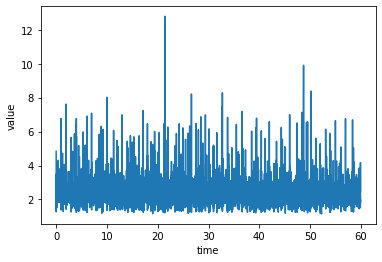

In [173]:
# Chart T1 
seaborn.lineplot(data=df, x="time", y="value")
plt.show()


In [174]:
# TESTE T2

! ../k6_scripts/run_load.sh t2 $default_test_endpoint $target $simulation_identifier

Running test (t2) - http://node.default.127.0.0.1.nip.io/ - local - identifier=local01

          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: /home/jovyan/k6_scripts/t2.js
     output: InfluxDBv1 (http://localhost:8086)

  scenarios: (100.00%) 1 scenario, 60 max VUs, 1m0s max duration (incl. graceful stop):
           * t2: Up to 60 looping VUs for 1m0s over 1 stages (gracefulRampDown: 0s)


     ✓ success

     checks.........................: 100.00% ✓ 207881      ✗ 0     
     data_received..................: 53 MB   877 kB/s
     data_sent......................: 20 MB   329 kB/s
     http_req_blocked...............: avg=3.03µs  min=712ns   med=2.19µs  max=63.32ms  p(90)=3.73µs  p(95)=4.5µs  
     http_req_connecting............: avg=41ns    min=0s      med=0s      max=446.56µs p(90)=0s      p(95)=0s     
     http

In [175]:
# RESULTS T2

bind_params={'s': simulation_identifier, 't':'t2' }
df = client.query('SELECT * FROM "http_req_duration" WHERE simulation=$s and type=$t',bind_params=bind_params)['http_req_duration']
vus = client.query('SELECT * FROM "vus"')['vus']


df['vus'] = vus.iloc[vus.index.get_indexer(df.index,method='nearest')]['value'].to_numpy()



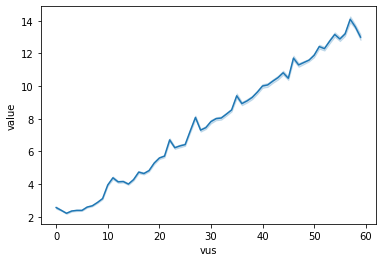

In [176]:
# T2 - show grafic
seaborn.lineplot(data=df, x='vus', y='value')
plt.show()

In [ ]:
# TESTE T3

! ../k6_scripts/run_load.sh t3 $default_test_endpoint $target $simulation_identifier



In [ ]:
# RESULTS T3


res = client.query('SELECT * FROM "http_req_duration" WHERE simulation=$s',bind_params={'s': 'teste2'})
res = res['http_req_duration']
res

# show grafic
seaborn.lineplot(data=res)
plt.show()


In [196]:
# TESTE T4

! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "payload" 32 
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "payload" 64 
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "payload" 128 
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "payload" 256 
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "payload" 512 


Running test (t4) - http://node.default.127.0.0.1.nip.io/payload - local - identifier=local02 - payload=32

          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: /home/jovyan/k6_scripts/t4.js
     output: InfluxDBv1 (http://localhost:8086)

  scenarios: (100.00%) 1 scenario, 60 max VUs, 1m0s max duration (incl. graceful stop):
           * t4: Up to 60 looping VUs for 1m0s over 1 stages (gracefulRampDown: 0s)


     ✓ success

     checks.........................: 100.00% ✓ 204397      ✗ 0     
     data_received..................: 31 MB   522 kB/s
     data_sent......................: 35 MB   590 kB/s
     http_req_blocked...............: avg=3.41µs  min=711ns  med=2.21µs  max=114.15ms p(90)=3.65µs  p(95)=4.49µs 
     http_req_connecting............: avg=49ns    min=0s     med=0s      max=576.01µs p(90)=0s      p(95)

Running test (t4) - http://node.default.127.0.0.1.nip.io/payload - local - identifier=local02 - payload=256

          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: /home/jovyan/k6_scripts/t4.js
     output: InfluxDBv1 (http://localhost:8086)

  scenarios: (100.00%) 1 scenario, 60 max VUs, 1m0s max duration (incl. graceful stop):
           * t4: Up to 60 looping VUs for 1m0s over 1 stages (gracefulRampDown: 0s)


     ✓ success

     checks.........................: 100.00% ✓ 214450      ✗ 0     
     data_received..................: 33 MB   548 kB/s
     data_sent......................: 37 MB   619 kB/s
     http_req_blocked...............: avg=2.82µs  min=721ns   med=2.24µs  max=11.48ms p(90)=3.61µs  p(95)=4.45µs 
     http_req_connecting............: avg=73ns    min=0s      med=0s      max=4.95ms  p(90)=0s      p(95

In [197]:
# RESULTS T4

bind_params={'s': simulation_identifier, 't':'t4' }
df = client.query('SELECT * FROM "http_req_duration" WHERE simulation=$s and type=$t',bind_params=bind_params)['http_req_duration']
vus = client.query('SELECT * FROM "vus"')['vus']


df['vus'] = vus.iloc[vus.index.get_indexer(df.index,method='nearest')]['value'].to_numpy()


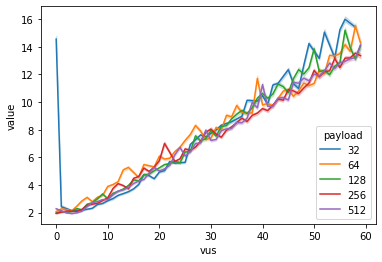

In [198]:

# T4 - show grafic
seaborn.lineplot(data=df, x='vus', y='value', hue='payload')
plt.show()



In [ ]:
# TESTE T5

default_test_endpoint='default.127.0.0.1.nip.io'
! ../k6_scripts/run_load.sh t4 "http://node.default.127.0.0.1.nip.io" $target $simulation_identifier "language" "node"
! ../k6_scripts/run_load.sh t4 "http://python.default.127.0.0.1.nip.io" $target $simulation_identifier "language" "python"
! ../k6_scripts/run_load.sh t4 "http://php.default.127.0.0.1.nip.io" $target $simulation_identifier "language" "php"
! ../k6_scripts/run_load.sh t4 "http://go.default.127.0.0.1.nip.io" $target $simulation_identifier "language" "go"
! ../k6_scripts/run_load.sh t4 "http://java.default.127.0.0.1.nip.io" $target $simulation_identifier "language" "java"
! ../k6_scripts/run_load.sh t4 "http://csharp.default.127.0.0.1.nip.io" $target $simulation_identifier "language" "csharp"


In [ ]:
# RESULTS T5

bind_params={'s': simulation_identifier, 't':'t4' }
df = client.query('SELECT * FROM "http_req_duration" WHERE simulation=$s and type=$t',bind_params=bind_params)['http_req_duration']
vus = client.query('SELECT * FROM "vus"')['vus']


df['vus'] = vus.iloc[vus.index.get_indexer(df.index,method='nearest')]['value'].to_numpy()


In [ ]:
# TESTE T6
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "language" "node"
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "language" "python"
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "language" "php"
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "language" "go"
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "language" "java"
! ../k6_scripts/run_load.sh t4 "$default_test_endpoint/payload" $target $simulation_identifier "language" "csharp"


In [ ]:
# RESULTS T6

res = client.query('SELECT * FROM "http_req_duration" WHERE simulation=$s',bind_params={'s': 'teste2'})
res = res['http_req_duration']
res

# show grafic
seaborn.lineplot(data=res)
plt.show()


In [ ]:
# TESTE T7

! ../k6_scripts/run_load.sh t7 $default_test_endpoint $target $simulation_identifier


In [ ]:
# RESULTS T7

res = client.query('SELECT * FROM "http_req_duration" WHERE simulation=$s',bind_params={'s': 'teste2'})
res = res['http_req_duration']
res

# show grafic
seaborn.lineplot(data=res)
plt.show()